<a href="https://colab.research.google.com/github/aymuos/masters-practise-repo/blob/main/TERM2/ML_Lab/Assignment/Assignment6/problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%pip install fastparquet

In [42]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
from sklearn.decomposition import PCA ,NMF
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import umap

In [6]:
df = pd.read_parquet('./assignment6_data.parquet')


In [7]:
df.head()

,Published_Sample_Name,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,RP5-890E16.5,RP11-122L4.2,LINC00624,RP5-1116H23.4,RP5-1099C19.2,RP3-405J10.5,MRPL45,RP11-327I22.5,SubGroup,BA
0,20131219_1C01,11.667,0.0,2.083,0.208,0.417,0.000,0.0,0.0,508.138000,...,0.000,0.000,0.833,0.0,0.625,0.625,1.042,0.0,Ex1,BA8
1,20131219_1C07,0.000,0.0,2.228,27.541,5.468,0.000,0.0,0.0,6.480000,...,0.810,0.000,0.608,0.0,0.608,0.000,8.505,0.0,Ex3,BA8
2,20131219_1C09,0.000,0.0,69.514,0.000,1.209,0.000,0.0,0.0,7.254000,...,1.813,1.511,0.907,0.0,0.000,0.000,4.533,0.0,Ex4,BA8
3,20131219_1C13,0.000,0.0,3.956,1.130,0.424,0.141,0.0,0.0,114.302002,...,0.565,0.141,0.141,0.0,0.000,0.000,1.554,0.0,Ex1,BA8
4,20131219_1C30,0.000,0.0,3.170,0.059,10.155,0.117,0.0,0.0,2.113000,...,0.000,0.000,1.702,0.0,0.176,0.000,0.470,0.0,Ex3,BA8


In [8]:
df.columns.value_counts()

,count
BA,1
Published_Sample_Name,1
RP11-706P11.2,1
RP11-694O4.1,1
RP11-227G15.11,1
...,...
FGR,1
C1orf112,1
SCYL3,1
DPM1,1


In [9]:
df.isnull().sum()

,0
Published_Sample_Name,0
TSPAN6,0
TNMD,0
DPM1,0
SCYL3,0
...,...
RP3-405J10.5,0
MRPL45,0
RP11-327I22.5,0
SubGroup,0


In [10]:
# for cols in df.columns:
#     print(df[cols].unique())

In [11]:
categorical_columns = df.select_dtypes(include='object').columns

if len(categorical_columns) > 0:
    print("Categorical columns present:", list(categorical_columns))
else:
    print("No categorical columns found.")

Categorical columns present: ['Published_Sample_Name', 'SubGroup', 'BA']


In [12]:
df=df.drop(["Published_Sample_Name"],axis=1)

In [13]:
variances = df.select_dtypes(include='number').var()
sorted_variances_list = variances.sort_values(ascending=False)
# print(sorted_variances_list)

In [14]:
count_df_to_remove = math.ceil(0.1 * len(df.columns))
print(count_df_to_remove, len(df.columns) , len(df.columns)-count_df_to_remove)


2501 25009 22508


In [15]:
genes_to_remove = sorted_variances_list.head(count_df_to_remove).index

# Remove the genes with the lowest variance
filtered_df = df.drop(columns=genes_to_remove)

print(filtered_df.head())

   TSPAN6  TNMD    DPM1   SCYL3  C1orf112    FGR  CFH  FUCA2        GCLC  \
0  11.667   0.0   2.083   0.208     0.417  0.000  0.0    0.0  508.138000   
1   0.000   0.0   2.228  27.541     5.468  0.000  0.0    0.0    6.480000   
2   0.000   0.0  69.514   0.000     1.209  0.000  0.0    0.0    7.254000   
3   0.000   0.0   3.956   1.130     0.424  0.141  0.0    0.0  114.302002   
4   0.000   0.0   3.170   0.059    10.155  0.117  0.0    0.0    2.113000   

    NFYA  ...  RP5-890E16.5  RP11-122L4.2  LINC00624  RP5-1116H23.4  \
0  0.000  ...         0.000         0.000      0.833            0.0   
1  0.000  ...         0.810         0.000      0.608            0.0   
2  0.302  ...         1.813         1.511      0.907            0.0   
3  0.141  ...         0.565         0.141      0.141            0.0   
4  0.000  ...         0.000         0.000      1.702            0.0   

   RP5-1099C19.2  RP3-405J10.5  MRPL45  RP11-327I22.5  SubGroup   BA  
0          0.625         0.625   1.042       

pre-processing

In [16]:
filtered_df.describe()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,RP11-325L12.7,RP11-147L13.14,RP5-890E16.5,RP11-122L4.2,LINC00624,RP5-1116H23.4,RP5-1099C19.2,RP3-405J10.5,MRPL45,RP11-327I22.5
count,3042.000000,3042.000000,3042.00000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,...,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000
mean,0.822299,0.154737,19.21839,9.019205,9.848455,0.151812,0.530995,1.238517,32.573555,2.503603,...,0.197894,0.675341,1.067618,0.071310,5.526154,0.124446,1.398045,1.065452,10.010563,0.215554
std,11.014392,2.870166,101.46994,41.409733,32.529816,1.704445,4.072570,31.444502,93.836884,23.007692,...,4.640892,15.037995,25.830683,0.763088,43.687672,2.469603,6.071043,16.176039,43.714279,4.470715
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.433250,0.000000,0.000000,0.000000,4.809000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.456000,0.000000,0.000000,0.000000,0.944000,0.000000
50%,0.000000,0.000000,0.62700,0.470000,1.309000,0.000000,0.000000,0.000000,8.534500,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.157000,0.000000,0.612500,0.000000,1.936500,0.000000
75%,0.000000,0.000000,6.67400,3.229250,4.354000,0.000000,0.334750,0.000000,21.801751,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.486000,0.000000,1.290000,0.000000,4.395000,0.000000
max,397.182007,108.210999,3540.61499,1170.454956,506.540009,77.455002,138.376999,1676.118042,1828.845947,728.849976,...,191.240997,713.752014,1197.171021,30.908001,1852.269043,99.593002,225.686996,757.687012,1215.561035,156.828995


# clearly there is imbalance in data scaling

In [17]:
# Define features (X) and target (y)
X = filtered_df.drop(columns=['BA', 'SubGroup'])  # Features: all columns except BA and SubGroup
y = filtered_df['SubGroup']  # Target: SubGroup column
z = filtered_df['BA']  # Target: BA column

In [18]:
data = X
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [19]:
# Apply PCA
pca = PCA(n_components=100)
pca.fit(scaled_data)

PCA(n_components=100)

In [20]:
# Transform the data
pca_outdata = pca.transform(scaled_data)

# Step 4: Analyze variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Variance captured by the top 100 components
variance_top_100 = cumulative_variance[99]  # Index 99 corresponds to the 100th component
print(f"Variance captured by the top 100 components: {variance_top_100:.2f}")

Variance captured by the top 100 components: 0.10


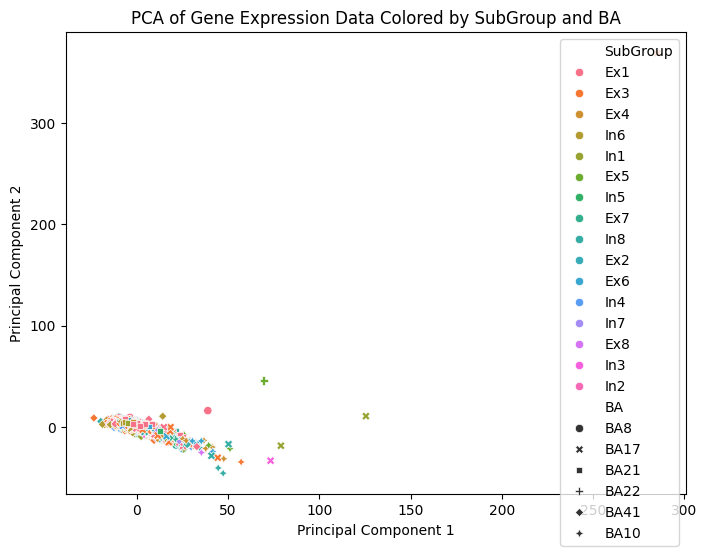

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_outdata[:, 0], y=pca_outdata[:, 1], hue=y, style=z)
plt.title('PCA of Gene Expression Data Colored by SubGroup and BA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


NMF needs non negative inputs , hence taking the original data and scaling it with MinMaxScalar


In [29]:
nmf_data = X
sclr = MinMaxScaler()
scaled_data_nmf = sclr.fit_transform(nmf_data)
scaled_data_nmf

array([[0.02937444, 0.        , 0.00058832, ..., 0.00082488, 0.00085722,
        0.        ],
       [0.        , 0.        , 0.00062927, ..., 0.        , 0.00699677,
        0.        ],
       [0.        , 0.        , 0.01963331, ..., 0.        , 0.00372914,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00064198, ..., 0.        , 0.00140264,
        0.        ],
       [0.        , 0.        , 0.00513131, ..., 0.00057148, 0.00071161,
        0.        ]], dtype=float32)

In [30]:
nmf = NMF(n_components=5, random_state=40) # Use NMF instead of PCA
nmf_data = nmf.fit_transform(scaled_data_nmf)  # Use scaled_data

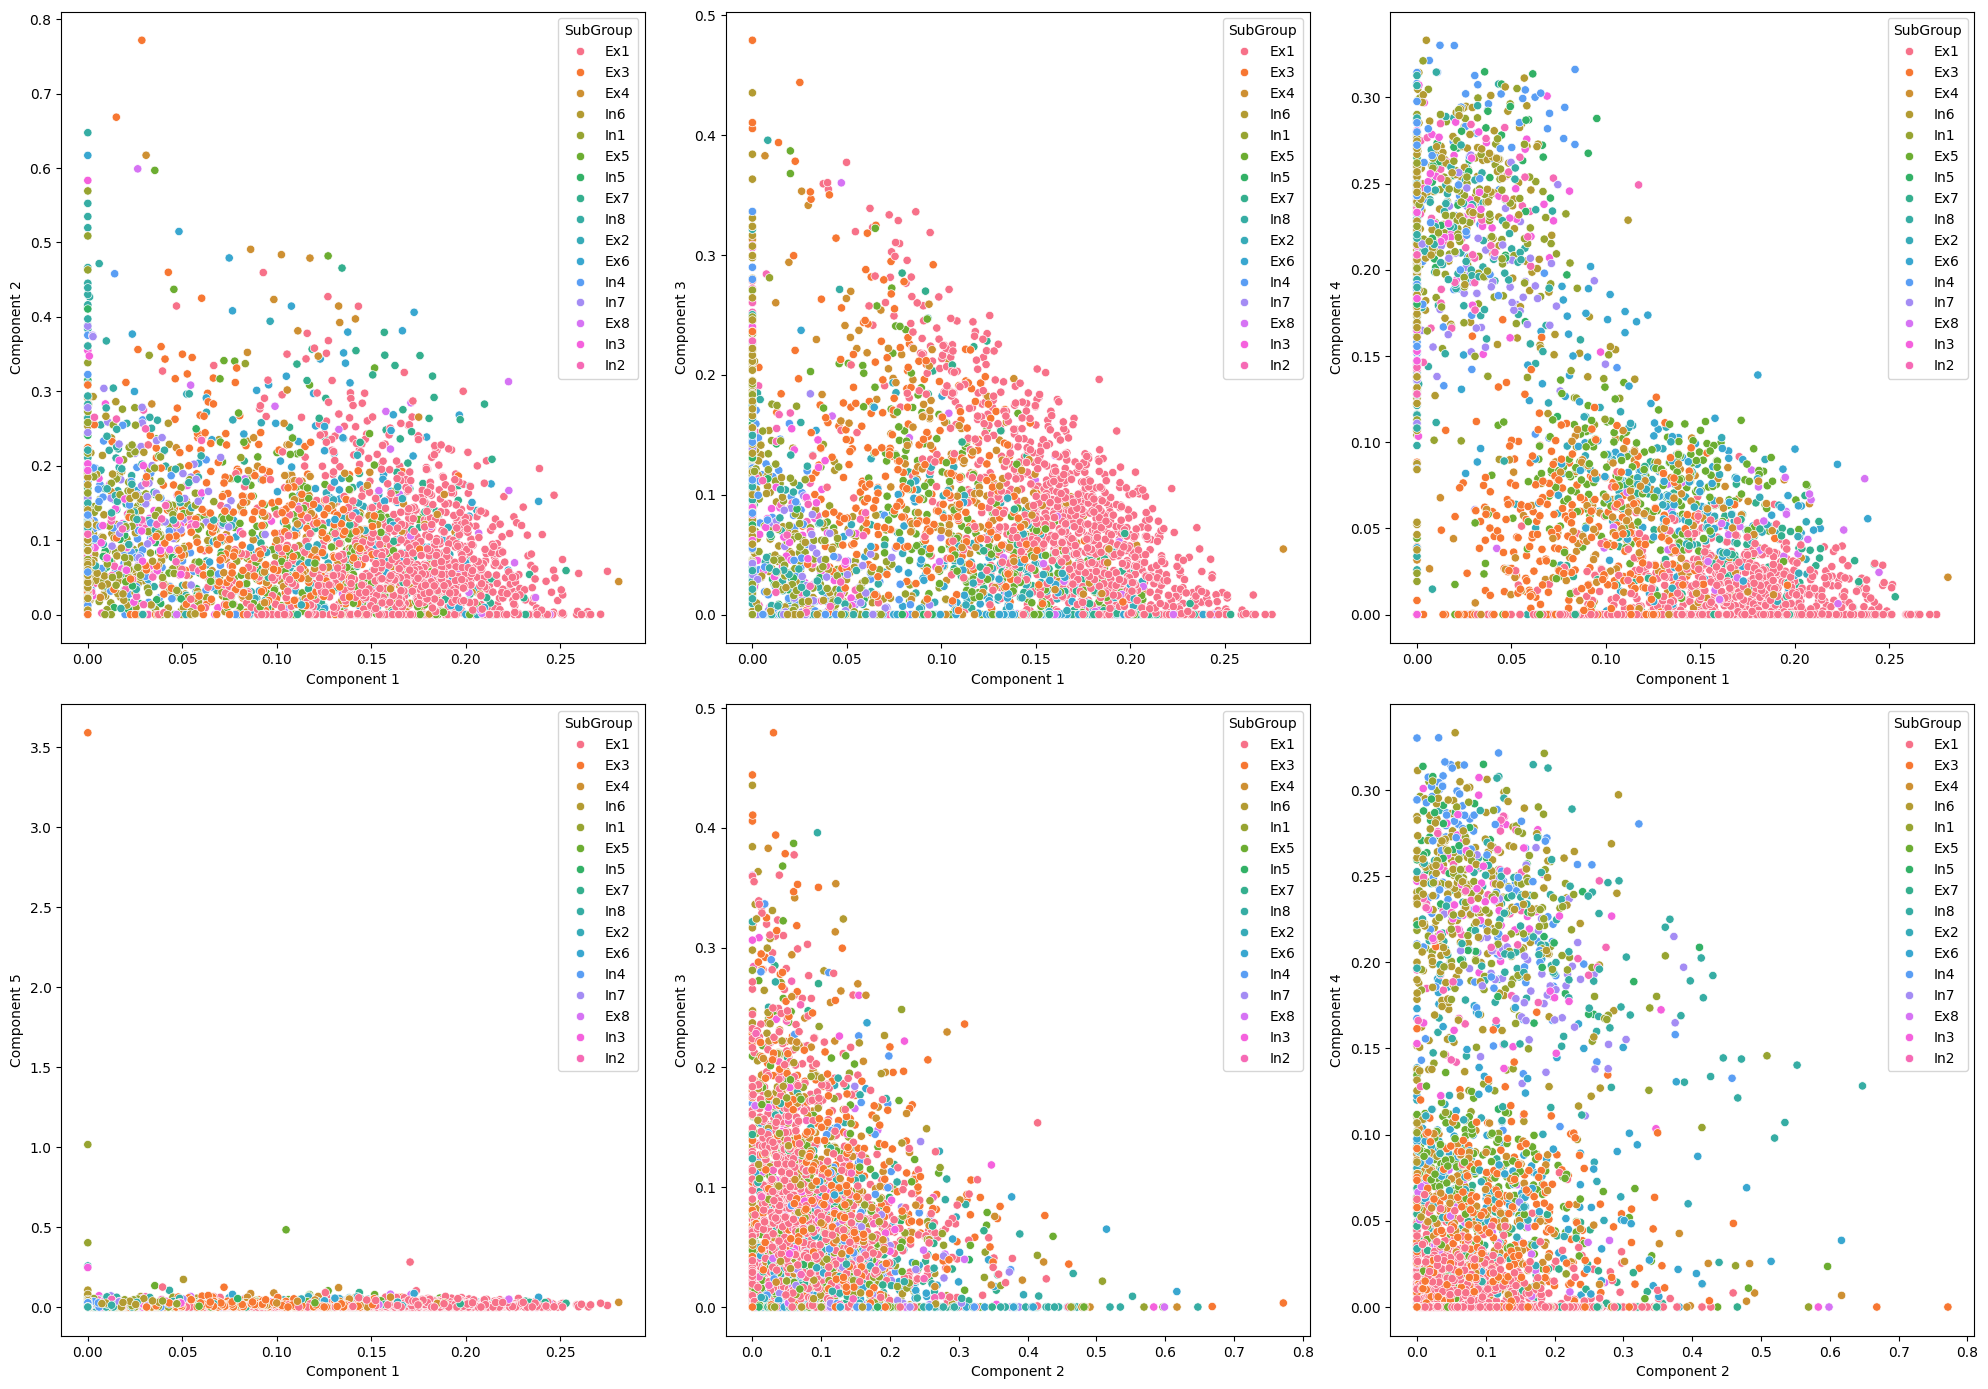

In [34]:
# Plotting components against each other
plt.figure(figsize=(20, 14))
subplot_index = 1  # Initialize subplot index

for i in range(5):
    for j in range(i + 1, 5):
        # Check if subplot_index exceeds the limit
        if subplot_index <= 6:
            plt.subplot(2, 3, subplot_index)  # Use subplot_index
            sns.scatterplot(x=nmf_data[:, i], y=nmf_data[:, j], hue=y)  # hue by subgroup
            plt.xlabel(f'Component {i + 1}')
            plt.ylabel(f'Component {j + 1}')
            subplot_index += 1  # Increment subplot index
        else:
            break  # Exit inner loop if limit is exceeded

plt.tight_layout()
plt.show()

In [35]:
# Identify top contributing features for each component
for component in range(5):
    # Get feature weights for the current component
    component_weights = nmf.components_[component]

    # Get indices of top 5 features
    top_feature_indices = np.argsort(component_weights)[-5:]

    # Get feature names from the original data
    top_features = X.columns[top_feature_indices]
    print(f"Top 5 features for component {component+1}: {top_features.tolist()}")

Top 5 features for component 1: ['RP11-86H7.6', 'AP000705.7', 'CH17-125A10.1', 'MEG3', 'EREG']
Top 5 features for component 2: ['AIM1L', 'EREG', 'PTRF', 'NBPF15', 'RP11-379C10.1']
Top 5 features for component 3: ['RP11-563J2.2', 'TNPO2', 'SLC22A17', 'APLP1', 'RNF187']
Top 5 features for component 4: ['RN7SKP36', 'ANKRD55', 'HUNK', 'EREG', 'GRIP2']
Top 5 features for component 5: ['DNAI2', 'RFTN1P1', 'RP4-543J13.1', 'RP11-162D9.3', 'RP11-222A11.1']


tSNE - t-distributed Stochastic Neighbor Embedding

t-SNE (t-distributed Stochastic Neighbor Embedding) is an unsupervised non-linear dimensionality reduction technique used for visualizing high-dimensional data in a lower-dimensional space, typically 2D or 3D. It was originally developed by Geoffrey Hinton and Sam Roweis, with Laurens van der Maaten and Hinton later proposing the t-distributed variant.

**How t-SNE Works**
The t-SNE algorithm works in three main steps:

* Similarity Calculation in High Dimensions: t-SNE first calculates pairwise similarities between data points in the high-dimensional space using a Gaussian kernel. Points that are close together have a higher probability of being selected as neighbors, while distant points have lower probability.

* Mapping to Lower Dimensions: The algorithm then creates a corresponding lower-dimensional representation where similar points in the high-dimensional space should be positioned close together.

* Optimization Process: t-SNE minimizes the Kullback-Leibler (KL) divergence between the probability distributions in the high and low-dimensional spaces using gradient descent. This optimization process ensures that the relationships between points are preserved as much as possible.

**Key Characteristics of t-SNE**

Preserves Local Structure: Unlike linear methods like PCA, t-SNE focuses on preserving local similarities between data points, making it excellent at revealing clusters and patterns.

Uses t-Distribution: In the low-dimensional space, t-SNE uses a heavy-tailed Student t-distribution (with one degree of freedom) instead of a Gaussian distribution. This helps address the "crowding problem" by allowing dissimilar objects to be modeled far apart.

Perplexity Parameter: t-SNE uses a parameter called "perplexity" which can be interpreted as a smooth measure of the effective number of neighbors. Typical values range between 5 and 50.

Computational Complexity: For a dataset with n elements, t-SNE runs in O(n²) time and requires O(n²) space, making it computationally intensive for very large datasets.

t-SNE vs. PCA
Characteristic	t-SNE	PCA
Type	Non-linear dimensionality reduction	Linear dimensionality reduction
Goal	Preserve local pairwise similarities	Preserve global variance
Best used for	Visualizing complex, high-dimensional data	Data with linear structure
Computational intensity	High	Low
Interpretation	Harder to interpret	Easier to interpret


In [36]:
# defining the function to perform t-SNE and plot the results
def perform_tsne_and_plot(data, perplexity, n_iter, random_state):
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter, random_state=random_state)
    tsne_results = tsne.fit_transform(data)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=z, style=z) # hue and style based on BA
    plt.title(f't-SNE of Gene Expression Data Colored by BA (perplexity={perplexity}, n_iter={n_iter})')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

In [37]:
# Parameters for t-SNE
perplexity = 30
n_iter = 300
random_state_list = [42, 100, 200]  # Three different random states

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


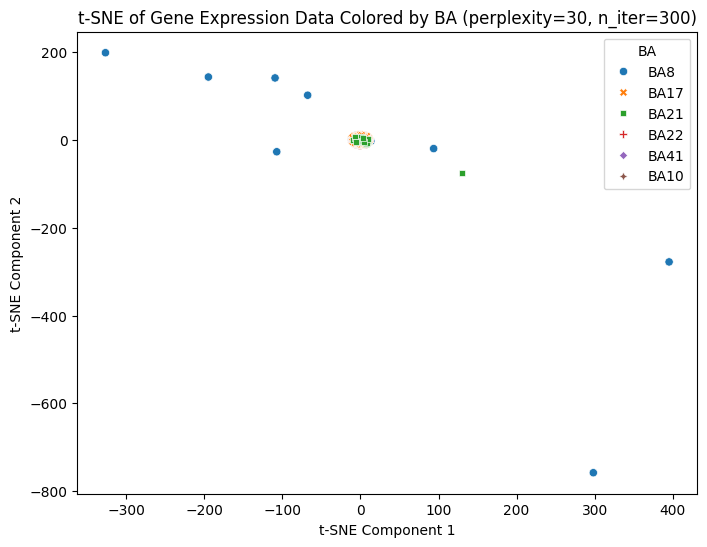

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


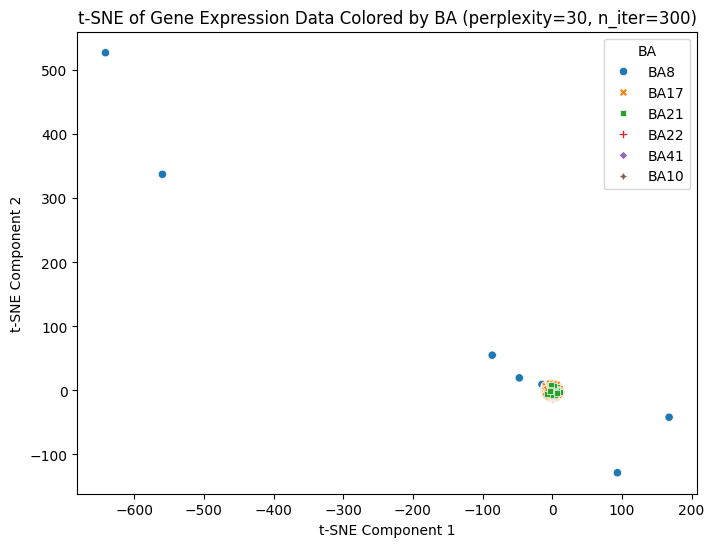

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


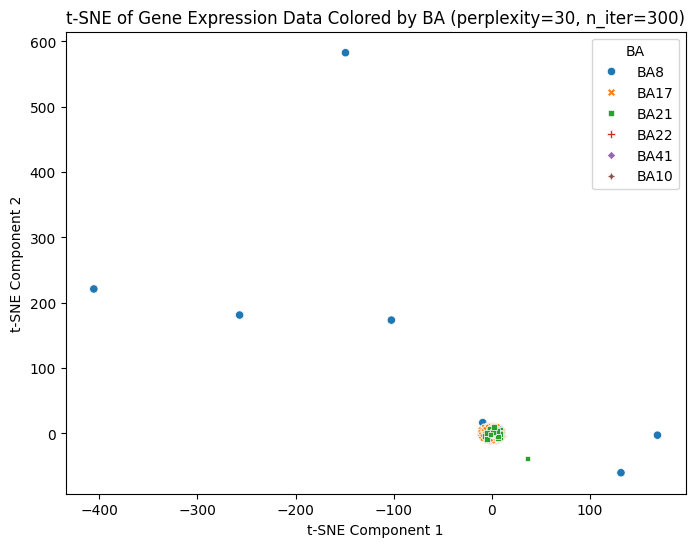

In [41]:
# Perform t-SNE three times with the same parameters but different random states
for random_state in random_state_list:
    perform_tsne_and_plot(scaled_data, perplexity, n_iter, random_state)

UMAP (Uniform Manifold Approximation and Projection) is a dimensionality reduction technique used to visualize and analyze high-dimensional data by creating a lower-dimensional representation that preserves the underlying structure and relationships.
Here's a more detailed explanation:
Key Concepts:
Dimensionality Reduction:
UMAP takes a high-dimensional dataset (with many features or variables) and transforms it into a lower-dimensional space (e.g., 2D or 3D) for easier visualization and analysis.
Manifold Learning:
UMAP is based on the idea that high-dimensional data often lies on a lower-dimensional manifold, a structure that can be approximated by a lower-dimensional space.
Graph Representation:
UMAP constructs a graph representation of the data, where each data point is a node, and connections between nodes represent similarity or proximity.
Projection:
UMAP then projects the high-dimensional graph onto a lower-dimensional space, aiming to preserve the structure and relationships of the original graph.
Visualization:
The resulting lower-dimensional representation can be used to visualize the data, identify clusters, and explore patterns.
How UMAP Works:
1. Graph Construction:
UMAP builds a high-dimensional graph of the data, where each data point is a node, and edges connect similar or nearby points.
2. Low-Dimensional Projection:
It then projects this high-dimensional graph onto a lower-dimensional space, trying to find a layout that preserves the structure of the original graph as much as possible.
3. Optimization:
UMAP uses an optimization algorithm to find the best low-dimensional representation, minimizing the difference between the high-dimensional and low-dimensional graphs.
Advantages of UMAP:
Scalability: UMAP is designed to handle large datasets efficiently.
Global Structure Preservation: UMAP is better than t-SNE at preserving the global structure of the data.
Interpretability: UMAP has more understandable parameters than t-SNE.
Computational Speed: UMAP is generally faster than t-SNE.
Applications of UMAP:
Single-cell RNA Sequencing (scRNA-seq):
UMAP is widely used to visualize and analyze scRNA-seq data, helping researchers identify cell types, clusters, and relationships.
Image Analysis:
UMAP can be used to reduce the dimensionality of image data, making it easier to visualize and analyze images.
Text Analysis:
UMAP can be used to reduce the dimensionality of text data, making it easier to visualize and analyze text documents.
Other High-Dimensional Data:
UMAP can be used to visualize and analyze any type of high-dimensional data.
Comparison with t-SNE:
Similarities:
Both UMAP and t-SNE are dimensionality reduction techniques used for visualization.
Differences:
UMAP is better at preserving global structure and is more scalable than t-SNE.

In [43]:
def perform_umap_and_plot(data, n_neighbors, target):
    reducer = umap.UMAP(n_neighbors=n_neighbors, random_state=42)
    embedding = reducer.fit_transform(data)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=target, palette='viridis')
    plt.title(f'UMAP of Gene Expression Data Colored by SubGroup (n_neighbors={n_neighbors})')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.show()

In [ ]:
# Apply UMAP for different n_neighbors values

n_neighbors_list = [8, 16, 32]
for n_neighbors in n_neighbors_list:
    perform_umap_and_plot(scaled_data, n_neighbors, y)
